AutoNLP is very similar to AutoML, it automates the process of EDA and text processing and helps data scientists to get the best model. AutoNLP is a function present in the AutoViML framework, built using scikit-learn, NumPy, pandas, and matplotlib. It is designed to build high-performance interpretable models with the fewest variables.

AutoNLP guides a data scientist in:

Exploratory data analysis of text
Data Cleaning
Feature reduction
Variable Classification
Produces model performance results as graphs
Can easily handle text, date-time, structs, numeric, boolean, factor, and categorical variables
Allows use the featuretools library to do Feature Engineering

In [1]:
!pip install autoviml

  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=9d1753e38269e3599fcc4d0b9f159542d4164b8a8e7b75ab04f66ee256984fe2
  Stored in directory: c:\users\vivih\appdata\local\pip\cache\wheels\0e\d1\c5\63b511b700c9da5a62bbfc758dd4a3fd9541df51b5db0694b0
Successfully built emoji


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\vivih\Downloads\train_nlp.csv")

In [4]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
from sklearn.model_selection import train_test_split

from autoviml.Auto_NLP import Auto_NLP

train, test = train_test_split(data, test_size=0.2)

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [6]:
#Specifying the Response and Predictor variables
input_feature, target = "tweet", "label"

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\vivih\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\vivih\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\vivih\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\vivih\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\vivih\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\vivih\AppData\Roaming\nl

Auto NLP processing on NLP Column: tweet
Shape of Train Data: 25569 rows
    Shape of Test Data: 6393 rows


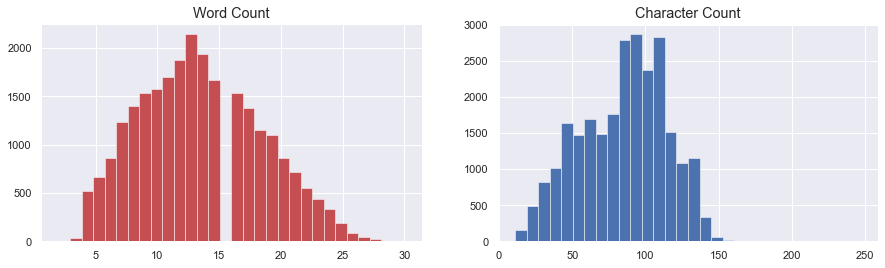

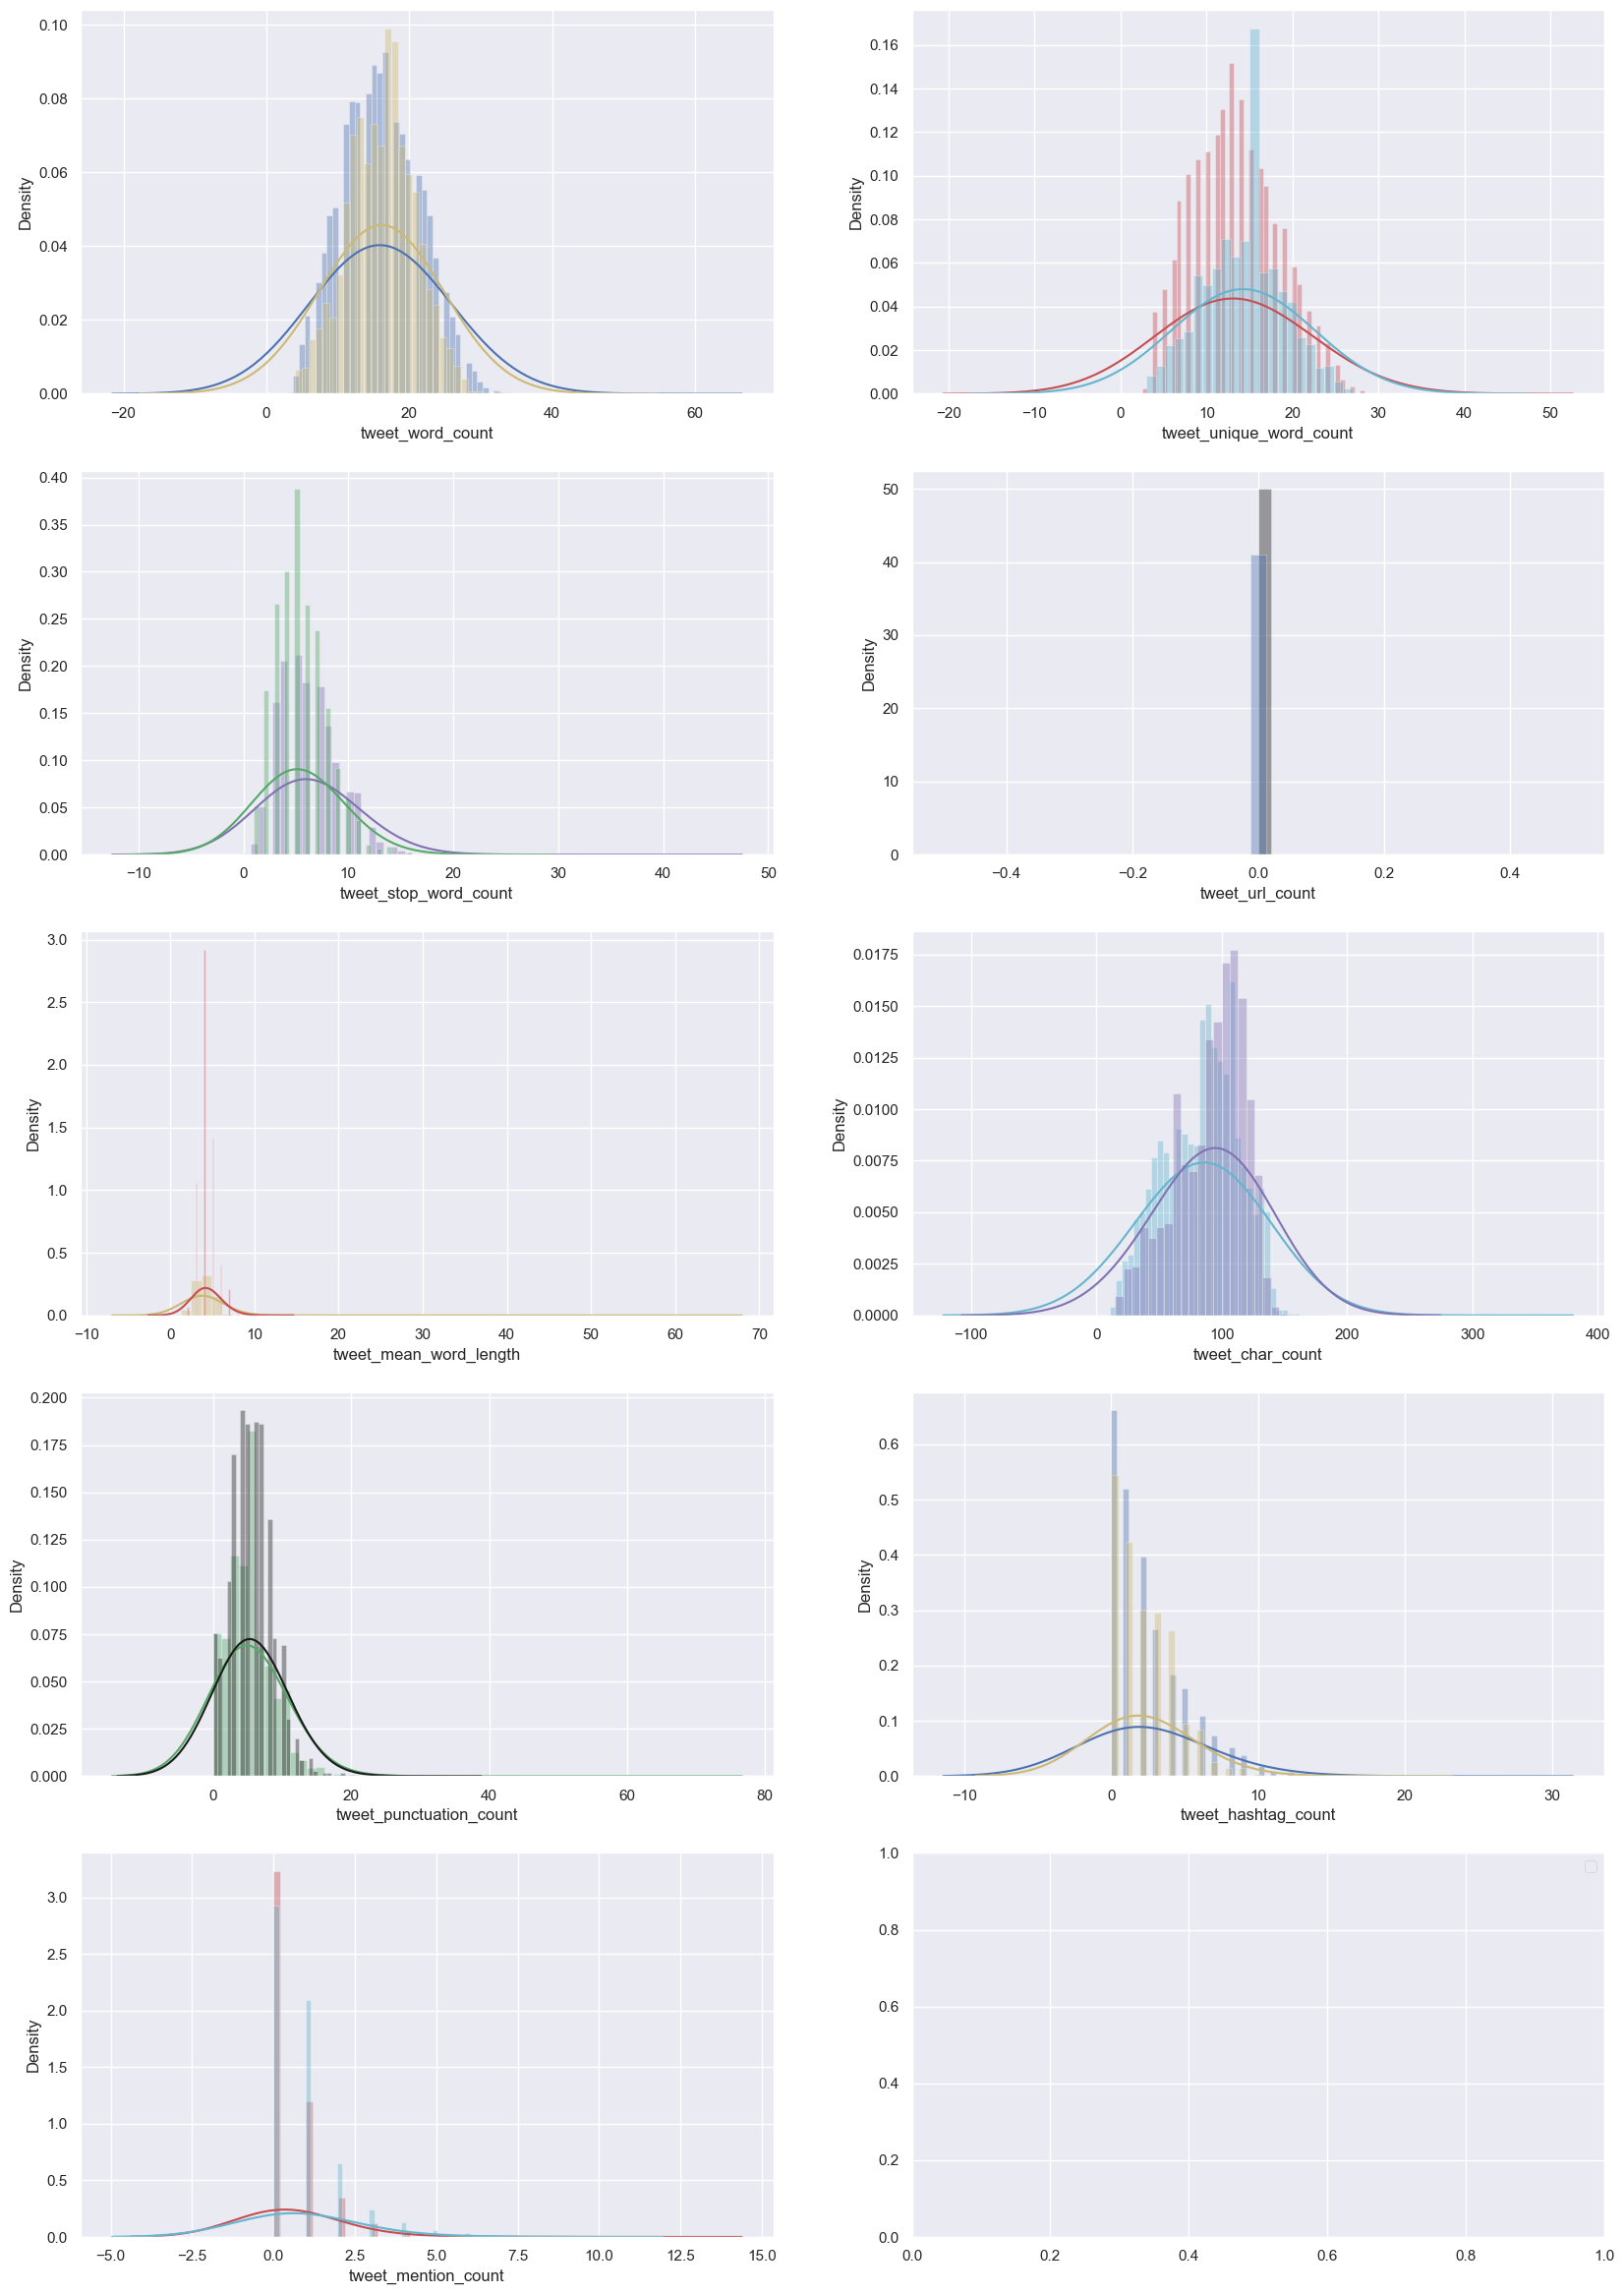

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for tweet column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 16 seconds

For target = label

    For class = 0
Top 200 n-grams
: ['user', 'love', 'day', 'happi', 'not', 'thank', 'posit', 'me', 'do', 'time', 'your', 'today', 'we', 'will', 'father', 'when', 'life', 'what', 'go', 'take', 'now', 'amp', 'bihday', 'new', 'like', 'see', 'make', 'good', 'smile', 'model', 'ur', 'cannot', 'but', 'our', 'peopl', 'wait', 'affirm', 'friend', 'healthi', 'how', 'look', 'feel', 'beauti', 'want', 'weekend', 'work', 'as', 'come', 'no', 'great', 'fun', 'famili', 'here', 'summer', 'way', 'week', 'they', 'fathersday', 'live', 'friday', 'tomorrow', 'girl', 'need', 'who', 'if', 'there', 'best', 'iam', 'first', 'ha', 'follow', 'morn', 'thing', 'dad', 'sunday', 'world', 'know', 'final', 'night', 'sad', 'watch', 'mu

In [ ]:
train_x, test_x, final, predicted= Auto_NLP(input_feature, train, test,target,
                                            score_type="balanced_accuracy",
                                            top_num_features=500,
                                            modeltype="Classification",
                                            verbose=2,
                                            build_model=True)

In [ ]:
testing = pd.read_csv(r"C:\Users\vivih\Downloads\test_nlp.csv")

In [ ]:
final.predict(testing[input_feature])

In [ ]:
prediction = pd.read_csv(r"C:\Users\vivih\Downloads\test_nlp.csv")

In [ ]:
prediction['label'] = final.predict(testing[input_feature])

In [ ]:
prediction.to_csv('prediction.csv',index = False)

In [ ]:
final_prediction=prediction.copy()
final_prediction['Prediction'] = prediction['label']
final_prediction

In [ ]:
Ground_truth=testing.copy()
Ground_truth['Ground_truth']=testing['label']
Ground_truth

In [ ]:
col = pd.DataFrame(final_prediction, columns=['tweet'])
col1 = pd.DataFrame(final_prediction, columns=['Prediction'])
col2 = pd.DataFrame(Ground_truth, columns=['Ground_truth'])

results = pd.concat([col,col1 , col2], axis=1)
results.to_csv('results.csv', index=False)
results

In [ ]:
# The confusion matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns

CM = confusion_matrix(results['Ground_truth'], results['Prediction'])
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM, annot=True, linewidth=0.7, linecolor='magenta', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(results['Ground_truth'], results['Prediction'])
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(results['Ground_truth'], results['Prediction'])))

print('Micro Precision: {:.2f}'.format(precision_score(results['Ground_truth'], results['Prediction'], average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(results['Ground_truth'], results['Prediction'], average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(results['Ground_truth'], results['Prediction'], average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(results['Ground_truth'], results['Prediction'], average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(results['Ground_truth'], results['Prediction'], average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(results['Ground_truth'], results['Prediction'], average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(results['Ground_truth'], results['Prediction'], average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(results['Ground_truth'], results['Prediction'], average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(results['Ground_truth'], results['Prediction'], average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(results['Ground_truth'], results['Prediction'], target_names=['Class 1', 'Class 2']))